# Lesson 1 - Problem Set

Please solve the questions in this notebook and submit the completed notebook. The timestamp of submission will be considered the timestamp of completion.

1. What is the Central Limit Theorem? $_{5\text{pts}}$

2. Suppose I sell Banh Mi, and the probability that I will receive a customer in any given hour is modeled by the data in `customer_pmf`. Write a python function which shows how the CLT arises from the provided distribution.

3. Let's assume that `voter_age_country` contains age data for the entire country of Thailand, and `voter_age_province` contains age data for the province of Amnat Charoen, which is the second most populous province in Thailand. You work for a political firm which is trying to determine voter turn out in Amnat Charoen. In order to more effectively target your advertising dollars, you decide to see analyze the average age of voters in Shanta. Thus you decide to test whether the average age of voters in Amnat Charoen differs from the average age of voters in the entire population of Thailand.
> Using the Hypothesis Testing methodology outlined during class, determine whether the average age of voters in Amnat Charoen differs from the entire population. $_{20\text{pts}}$

In [1]:
import numpy as np

#### Problem 2 data ###
customer_pmf = np.random.poisson(12, size=50000)

#### Problem 3 data ####
voter_age_country = np.concatenate([np.random.poisson(35,size=15000),np.random.poisson(10,size=10000)])
voter_age_province = np.concatenate([np.random.poisson(30,size=30),np.random.poisson(10,size=20)])

## 1. What is the Central Litmit Theorem?

take a group and sample, average the outcome. Repeat the process. Distribution of final outcome is normal Distribution.

## 2. Suppose I sell Banh Mi, and the probability that I will receive a customer in any given hour is modeled by the data in customer_pmf. Write a python function which shows how the CLT arises from the provided distribution.

In [2]:
def apply_clt(X):
    trials = 1000000
    size = 10
    samples = []
    for i in range(0, trials):
        sample = np.random.choice(X, size=size)
        samples.append(np.mean(sample))
    return samples

In [2]:
pmf = apply_clt(customer_pmf)

(array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00,
        5.20000e+01, 2.90000e+02, 1.63300e+03, 6.65800e+03, 2.02930e+04,
        4.89070e+04, 9.41800e+04, 1.42813e+05, 1.75954e+05, 1.76090e+05,
        1.42934e+05, 9.70050e+04, 5.39080e+04, 2.50290e+04, 9.66000e+03,
        3.38200e+03, 9.44000e+02, 2.24000e+02, 3.50000e+01, 7.00000e+00]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
        16.5, 17. , 17.5]),
 <a list of 35 Patch objects>)

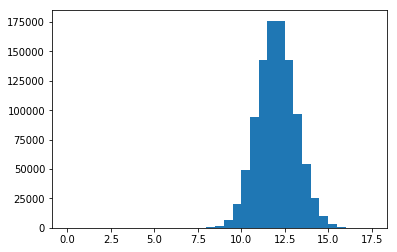

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(pmf, bins=np.arange(0, 18, 0.5))

### 3. 
Let's assume that `voter_age_country` contains age data for the entire country of Thailand, and `voter_age_province` contains age data for the province of Amnat Charoen, which is the second most populous province in Thailand. You work for a political firm which is trying to determine voter turn out in Amnat Charoen. In order to more effectively target your advertising dollars, you decide to see analyze the average age of voters in Shanta. Thus you decide to test whether the average age of voters in Amnat Charoen differs from the average age of voters in the entire population of Thailand.
> Using the Hypothesis Testing methodology outlined during class, determine whether the average age of voters in Amnat Charoen differs from the entire population. $_{20\text{pts}}$

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
def plot_dist(data, legends):
    fig, ax = plt.subplots()
    for idx, datum in enumerate(data):
        sns.distplot(datum, ax=ax, label=legends[idx])
    plt.legend()
# fig, ax = plt.subplots()
# sns.distplot(voter_age_country, ax=ax, label='contry')
# sns.distplot(voter_age_province, ax=ax, label='province')
# plt.legend()
plot_dist([voter_age_country, voter_age_province], ['country', 'province'])

In [5]:
clt_country = apply_clt(voter_age_country)
clt_province = apply_clt(voter_age_province)

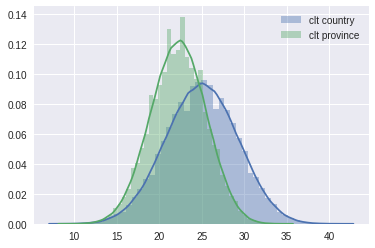

In [8]:
%matplotlib inline
plot_dist([clt_country, clt_province], ['clt country', 'clt province'])

H$_{0}$: the average age of voters in Amnat Charoen is the same with the average age of voters in the entire population of Thailand. (=)

H$_{A}$: the average age of voters in Amnat Charoen differs from the average age of voters in the entire population of Thailand. ($\neq$)

Select $\alpha$ = 0.05

In [9]:
alpha = 0.05

In [10]:
# country
mean_country = np.mean(clt_country)
std_country  = np.std(clt_country)
print(mean_country, std_country)

24.9835328 4.1951977893


In [43]:
# province
mean_province = np.mean(clt_province)
std_province = np.std(clt_province)
print(mean_province, std_province)

22.2414906 3.21847374234


In [102]:
trials = 20
sample_province = np.random.choice(clt_province, trials)
mean_sample = np.mean(sample_province)
std_sample = np.std(sample_province)
print(mean_sample, std_sample)

22.06 2.68149212194


In [103]:
# calculate 
from scipy import stats
critical_value = stats.norm.ppf(alpha)
print(critical_value)

-1.64485362695


z = (xbar - miu) / std = (xbar - miu)/ (std/sqrt(n))

In [104]:
z_score = (mean_sample - mean_country) / (std_sample / np.sqrt(trials))
print(z_score)

-4.87580628843


In [105]:
pval = stats.norm.cdf(z_score)
print(pval)
print('pval < alpha: ', pval < alpha)

5.418245526e-07
pval < alpha:  True


pval < alpha => reject H$_0$, accept H$_A$